# üìå Í≥®Ï†à Î∂ÄÏúÑ ÎπÑÏú®Ïóê Îî∞Î•∏ Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [7]:
Fractured = np.load("./Fractured_240.npy")
Mask = np.load("./Fractured_mask_240.npy")

print("Fractured Shape :", Fractured.shape)
print("Fractured Mask Shape :", Mask.shape)

Fractured Shape : (717, 240, 240)
Fractured Mask Shape : (717, 240, 240)


# 2. Îç∞Ïù¥ÌÑ∞ shapeÏùò channel Ï∂îÍ∞Ä
* Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ïÏùÑ Ìï¥Ï£ºÎäî Ìï®ÏàòÏù∏ ImageDataGeneratorÎ•º ÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî ÏïÑÎûòÏôÄ Í∞ôÏùÄ ÌòïÌÉúÏùò Îç∞Ïù¥ÌÑ∞Î•º inputÏúºÎ°ú Ï§òÏïºÌï®.

In [8]:
Fractured = np.expand_dims(Fractured, axis=-1)
Mask = np.expand_dims(Mask, axis=-1)

print("Fractured shape :", Fractured.shape)
print("Mask shape :", Mask.shape)

Fractured shape : (717, 240, 240, 1)
Mask shape : (717, 240, 240, 1)


# 3. Data Augmentation
* image_generatorÏôÄ mask_generatorÏùò seedÎ•º ÎèôÏùºÌïòÍ≤å ÌïòÏó¨ ÎèôÏùºÌïú Î≥ÄÌôòÏùÑ Ï†ÅÏö©ÌïòÎèÑÎ°ù Ìï®.
* Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞Îäî Í∑∏ÎåÄÎ°ú ÌôúÏö©ÌïòÍ∏∞ ÏúÑÌï¥ Ïö∞ÏÑ† augmented listÏóê ÎÑ£Ïñ¥ ÎÜìÏïòÏäµÎãàÎã§.
* augmented listÏùò ÌÅ¨Í∏∞Í∞Ä 2000Ïù¥ Îê† Îïå ÍπåÏßÄ Îç∞Ïù¥ÌÑ∞Î•º Ï¶ùÍ∞ïÌïòÏó¨ augmented listÏóê Ï†ÄÏû•Ìï©ÎãàÎã§.

In [9]:
# Ïù¥ÎØ∏ÏßÄ Î∞è ÎßàÏä§ÌÅ¨ Ï¶ùÍ∞ï ÏÑ§Ï†ï
image_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

mask_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# ÏãúÎìúÎ•º ÎßûÏ∂∞ Ïù¥ÎØ∏ÏßÄÏôÄ ÎßàÏä§ÌÅ¨Í∞Ä ÎèôÏùºÌïú Î≥ÄÌôòÏùÑ Î∞õÎèÑÎ°ù ÏÑ§Ï†ï
seed = 42
image_generator = image_datagen.flow(Fractured, batch_size=1, seed=seed)
mask_generator = mask_datagen.flow(Mask, batch_size=1, seed=seed)

# Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞ Ï∂îÍ∞Ä Î∞è Ï¶ùÍ∞ï Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏ Ï¥àÍ∏∞Ìôî
augmented_images = []
augmented_masks = []

# Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞ Ï∂îÍ∞Ä
augmented_images.extend(Fractured)
augmented_masks.extend(Mask)

# 2000Í∞ú Îç∞Ïù¥ÌÑ∞Í∞Ä Îê† ÎïåÍπåÏßÄ Ï¶ùÍ∞ï Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
total_data = len(augmented_images)
while total_data < 2000:
    augmented_image = next(image_generator)[0].astype('uint8')
    augmented_mask = next(mask_generator)[0].astype('uint8')
    
    augmented_images.append(augmented_image)
    augmented_masks.append(augmented_mask)
    
    total_data += 1

# ÎÑòÌååÏù¥ Î∞∞Ïó¥Î°ú Î≥ÄÌôò
augmented_images = np.array(augmented_images)
augmented_masks = np.array(augmented_masks)

# Ï†ÄÏû•Ìï† ÎîîÎ†âÌÑ∞Î¶¨ ÏÉùÏÑ±
output_dir = "augmented_data"
os.makedirs(output_dir, exist_ok=True)

# Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•
np.save(os.path.join(output_dir, "augmented_images.npy"), augmented_images)
np.save(os.path.join(output_dir, "augmented_masks.npy"), augmented_masks)

print(f"Ï¥ù {len(augmented_images)}Í∞úÏùò Ï¶ùÍ∞ïÎêú Ïù¥ÎØ∏ÏßÄÏôÄ ÎßàÏä§ÌÅ¨Í∞Ä Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

Ï¥ù 2000Í∞úÏùò Ï¶ùÍ∞ïÎêú Ïù¥ÎØ∏ÏßÄÏôÄ ÎßàÏä§ÌÅ¨Í∞Ä Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


# 4. Ï¶ùÍ∞ïÌïú Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî 

In [11]:
augmented_images = np.load("./augmented_data/augmented_images.npy")
augmented_masks = np.load("./augmented_data/augmented_masks.npy")

print("augmented_images Shape :", augmented_images.shape)
print("augmented_masks Shape :", augmented_masks.shape)

augmented_images Shape : (2000, 240, 240, 1)
augmented_masks Shape : (2000, 240, 240, 1)


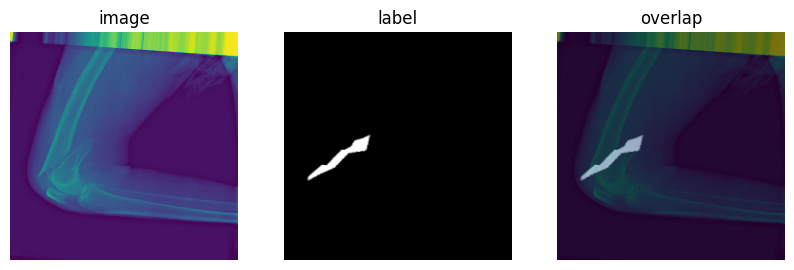

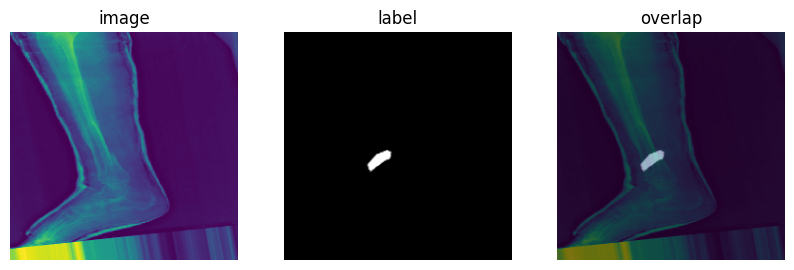

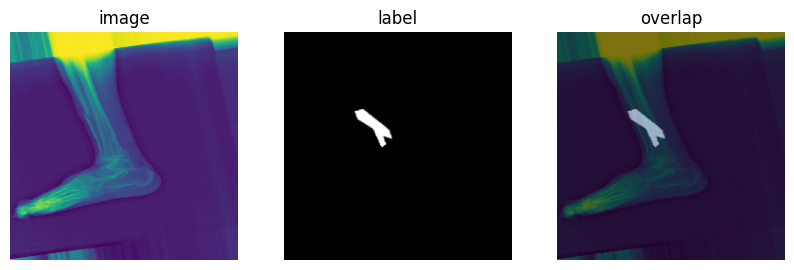

In [17]:
import matplotlib.pyplot as plt

num_list = [900, 1860, 1999]

for num in num_list:
    plt.figure(figsize=(10, 5))
    
    # ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ
    plt.subplot(131)
    plt.imshow(augmented_images[num])
    plt.title("image")
    plt.axis("off")
    
    # ÎßàÏä§ÌÅ¨ Ïù¥ÎØ∏ÏßÄ
    plt.subplot(132)
    plt.imshow(augmented_masks[num], cmap='gray')
    plt.title("label")
    plt.axis("off")
    
    # Í≤πÏ≥êÎ≥¥Í∏∞ (overlap)
    plt.subplot(133)
    plt.imshow(augmented_masks[num], cmap='gray')
    plt.title("overlap")
    plt.axis("off")
    plt.imshow(augmented_images[num], alpha=0.5)
    
    plt.show()
